# Twitter Stock Sentiment Analysis Project

## Project Objectives
This project aims to analyze stock market sentiments from Twitter tweets using machine learning techniques. I want to explore if the sentiment surrounding these stocks could have an impact on their performance in the stock market.

In [1]:
# All of our imports
import pandas as pd

In [2]:
# Importing the training data
training_data = pd.read_csv('Data/trainingData/final_data.csv')
training_data = training_data.iloc[: , 1:]
training_data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
13965,"$SBUX down PM, from $DB downgrade.. PT shorten...",0
13966,Finnish developer and manufacturer of mobile p...,0
13967,Operating profit savage to EUR 38.1 mn from EU...,0
13968,HSBC articulate Unit to Book $585 Million Char...,0


## Analyzing the composition of the training data
It is important to analyze the composition of the training data in order to identify any potential class imbalances (between positive and negative sentiments for example). 

Class Distribution:
Sentiment
1    8262
0    5708
Name: count, dtype: int64


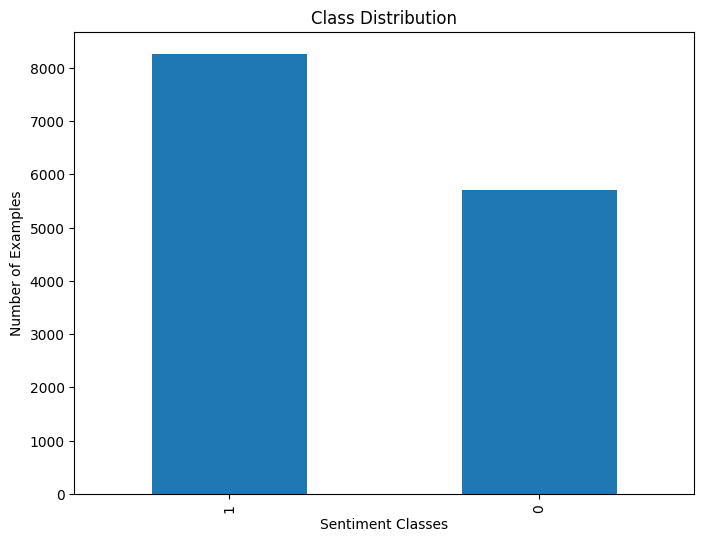

In [3]:
import matplotlib.pyplot as plt

# Check the class distribution
label_counts = training_data['Sentiment'].value_counts()

# Print the counts
print("Class Distribution:")
print(label_counts)

# Visualizing the class distribution
label_counts.plot(kind='bar', title='Class Distribution', figsize=(8, 6))
plt.xlabel('Sentiment Classes')
plt.ylabel('Number of Examples')
plt.show()

From the visualization it can be seen that although the classes are not exactly equally distributed, the difference is still relatively mild, and thus the training data is suitable to proceed.

In [4]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X = training_data['Text']  
y = training_data['Sentiment']  

# Stratifying to ensure that the training and testing data contains both classes in the same ratio as the original dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Text vectorization
Text vectorization converts text data into a vector of numbers with different sizes based on the size of the vocabulary.
We also consider unigrams and bigrams while removing common english stop words from the text

In [5]:
# Making a vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Making a vectorizer with a 5000 word vocabulary and that considers unigrams and bigrams
vectorizer = TfidfVectorizer(
    max_features=5000,        
    ngram_range=(1, 2),
    stop_words='english'      # Remove common English stop words
)

# Tranforming the training and testing data
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [6]:
# Defining the models that I will use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

/Users/aadeesh/miniconda3/envs/titanic/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt


# Training the models
for model_name, model in models.items():
    model.fit(X_train_transformed, y_train)

In [8]:
# Dictionary to store metrics
metrics = []

# Predict on the test set
for model_name, model in models.items():
    y_pred = model.predict(X_test_transformed)
    
    # Calculate evaluation metrics
    metric_data = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }
    metrics.append(metric_data)
    # Convert metrics to a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.set_index("Model")
metrics_df.sort_values(by="F1-Score", ascending=False, inplace=True)
metrics_df

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Support Vector Machine,0.810666,0.809650,0.810666,0.809416
Logistic Regression,0.803508,0.804365,0.803508,0.799911
XGBoost,0.765211,0.773179,0.765211,0.754867


## Model Selection
Since the best perfoming model was the SVM, we will use SVM to predict the sentiment scores of over 80k+ tweets

I will first import the dataset and then clean/preprocess it before making our predictions.


In [9]:
# Load the dataset
tweetsData = pd.read_csv("Data/stockTweets.csv")  # Replace with your dataset file path
tweetsData

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [10]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define the preprocessing function
def preprocess_tweet(text):
    # List of stop words
    stop_words = set(stopwords.words('english'))
    
    # Lowercase the text
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)
    # Remove emojis and special characters
    text = re.sub(r"[^\w\s,]", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    # Tokenize and remove stop words
    tokens = text.split()
    filtered_text = " ".join([word for word in tokens if word not in stop_words])
    
    return filtered_text

# Apply preprocessing to the Tweet column
tweetsData['Cleaned_Tweet'] = tweetsData['Tweet'].apply(preprocess_tweet)
tweetsData


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadeesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Date,Tweet,Stock Name,Company Name,Cleaned_Tweet
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media done amazing job brainwashing...
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates around 364k analysts ...
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.","3 even include 630m unvested rsus 630, additio..."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha still trying stop tesla fsd bro get shi...
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","stop trying kill kids, sad deranged old man"
...,...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,fastest growing tech stocks market mix upst xp...
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,"earnings horizon, quick snapshot largest incre..."
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,record delivery results testimony unwavering p...
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,"delivered 10,412 smart evs sep 2021, reaching ..."


In [11]:
# Transforming the tweet data using the same TF_IDF vectorizer
transformedTweets = vectorizer.transform(tweetsData['Cleaned_Tweet'])  
transformedTweets

<80793x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 792364 stored elements in Compressed Sparse Row format>

In [12]:
# Making our predictions on the data using our SVM model

svm_model = models["Support Vector Machine"]
sentiment_scores = svm_model.predict(transformedTweets)
tweetsData["Sentiment"] = sentiment_scores
tweetsData.head(10)

,Date,Tweet,Stock Name,Company Name,Cleaned_Tweet,Sentiment
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",mainstream media done amazing job brainwashing...,1
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",tesla delivery estimates around 364k analysts ...,0
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.","3 even include 630m unvested rsus 630, additio...",1
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",hahaha still trying stop tesla fsd bro get shi...,1
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","stop trying kill kids, sad deranged old man",1
5,2022-09-29 22:25:53+00:00,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",,1
6,2022-09-29 22:24:22+00:00,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",years viciously silenced critics failing silen...,1
7,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",nio im money doesnt mean bad investment whole ...,1
8,2022-09-29 22:23:28+00:00,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",50 likes spy tsla charts study,0
9,2022-09-29 22:15:01+00:00,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.","powerwalls waterproof, could bad wiring house ...",0


In [13]:
tweetsData["Stock Name"].unique()

array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

In [14]:
# Convert 'Date' column to datetime format if not already
tweetsData['Date'] = pd.to_datetime(tweetsData['Date'])

# Extract only the date (removes time component)
tweetsData['Date'] = tweetsData['Date'].dt.date

# Display the updated dataframe
tweetsData['Date']

0        2022-09-29
1        2022-09-29
2        2022-09-29
3        2022-09-29
4        2022-09-29
            ...    
80788    2021-10-07
80789    2021-10-04
80790    2021-10-01
80791    2021-10-01
80792    2021-09-30
Name: Date, Length: 80793, dtype: object

In [15]:
tesla_df, apple_df, intel_df, google_df, amzn_df, msft_df, meta_df = {}, {}, {}, {}, {}, {}, {}

done = []
for i in tweetsData.Date:
    date = i
    if date not in done:
        tesla_df[date] = 0
        apple_df[date] = 0
        intel_df[date] = 0
        google_df[date] = 0
        amzn_df[date] = 0
        msft_df[date] = 0
        meta_df[date] = 0
target_stocks = ['TSLA', 'AAPPL', 'INTC', 'AMZN', 'MSFT', 'META', 'GOOG']
for date, sentiment, stock in zip(tweetsData['Date'], tweetsData['Sentiment'], tweetsData['Stock Name']):
    if stock in target_stocks:
        # print(stock)
        # if stock == 'APPL':
        #     print(stock)
        if sentiment == 1:
            if stock == "TSLA":
                tesla_df[date] += sentiment
            if stock == "APPL":
                apple_df[date] += sentiment
                print(stock)
            if stock == "NVDA":
                intel_df[date] += sentiment
            if stock == "GOOGL":
                google_df[date] += sentiment
            if stock == "AMZN":
                amzn_df[date] += sentiment
            if stock == "MSFT":
                msft_df[date] += sentiment
            if stock == "META":
                meta_df[date] += sentiment

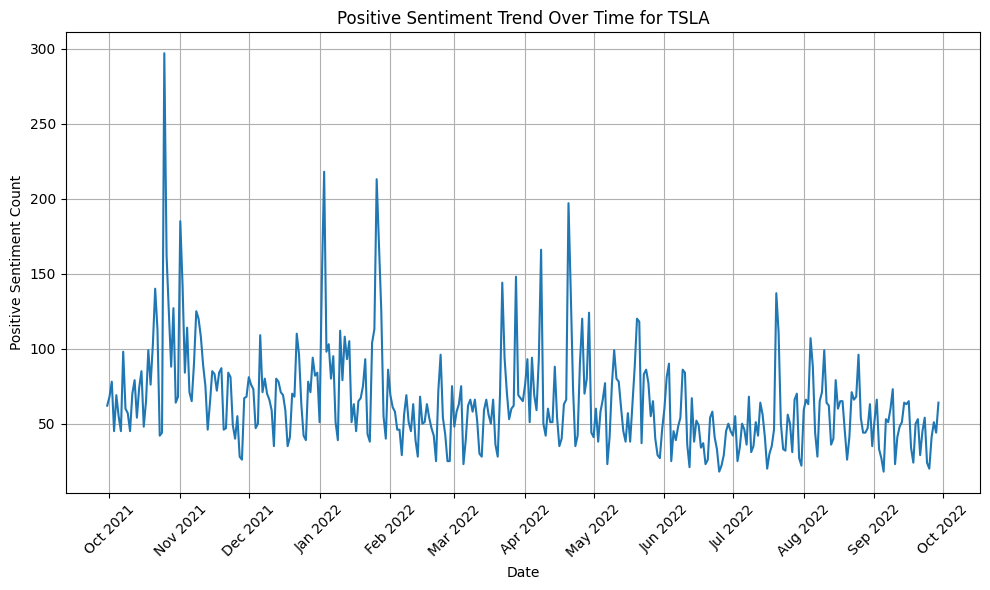

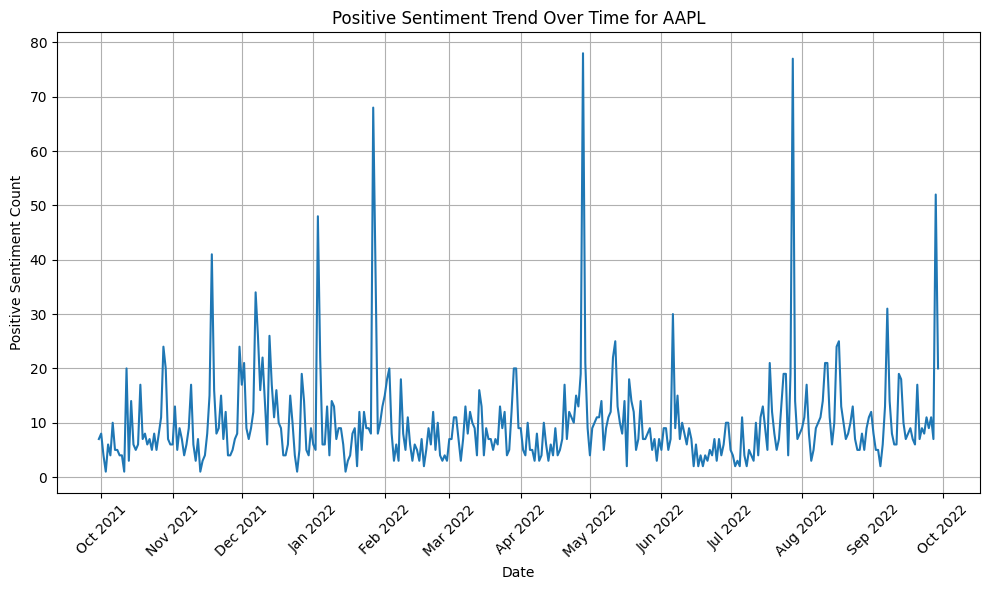

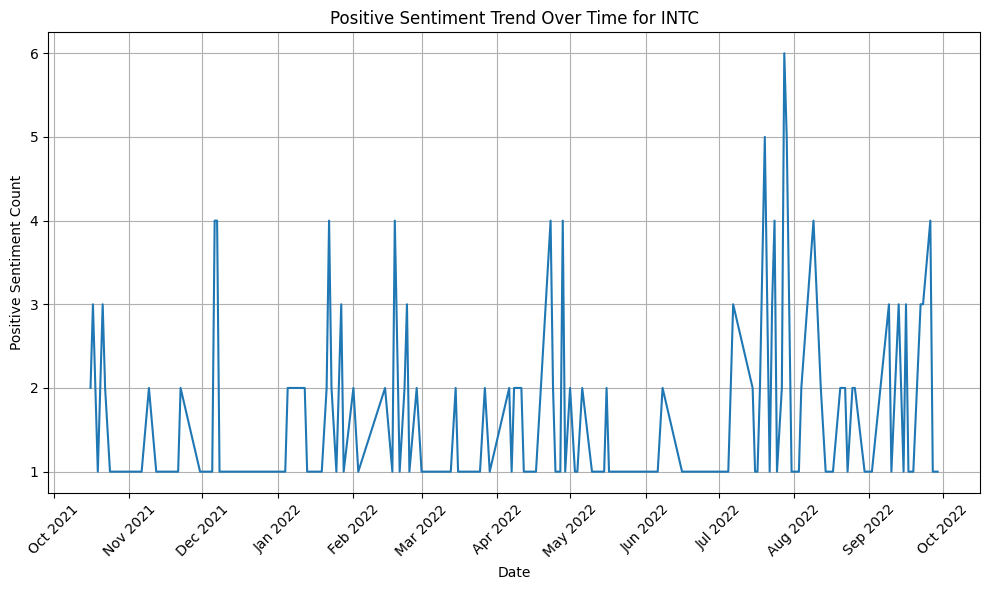

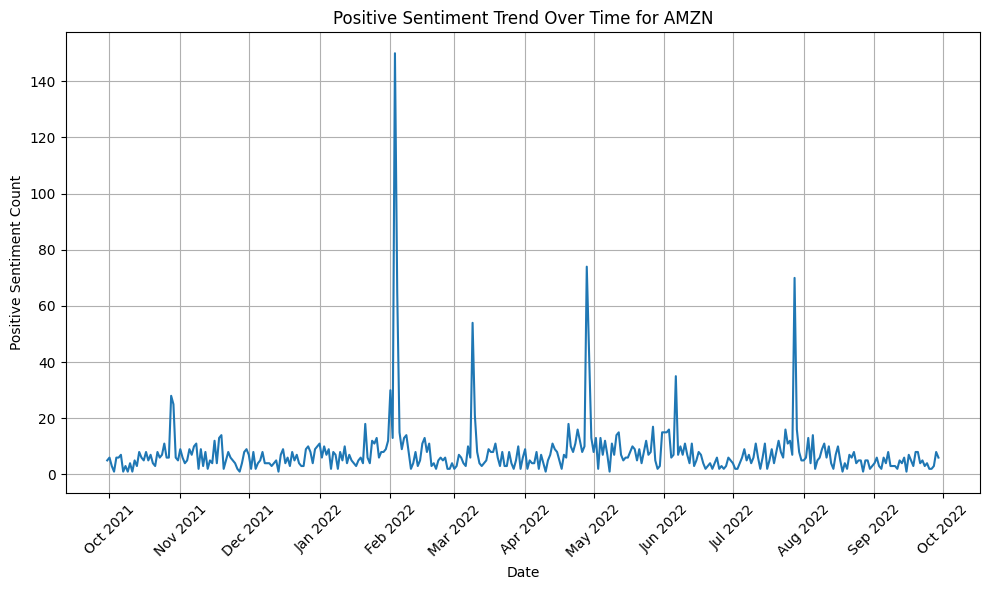

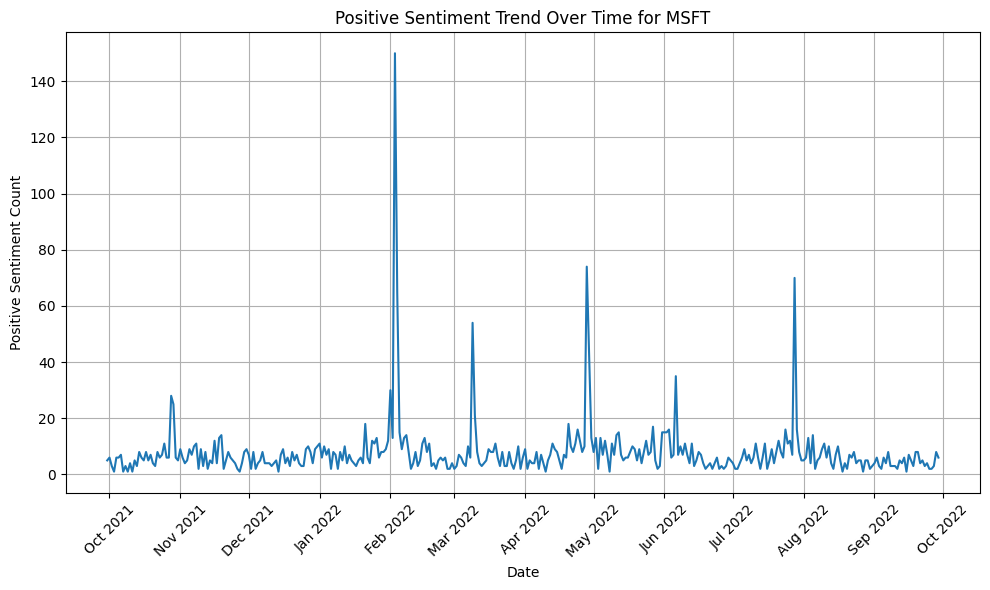

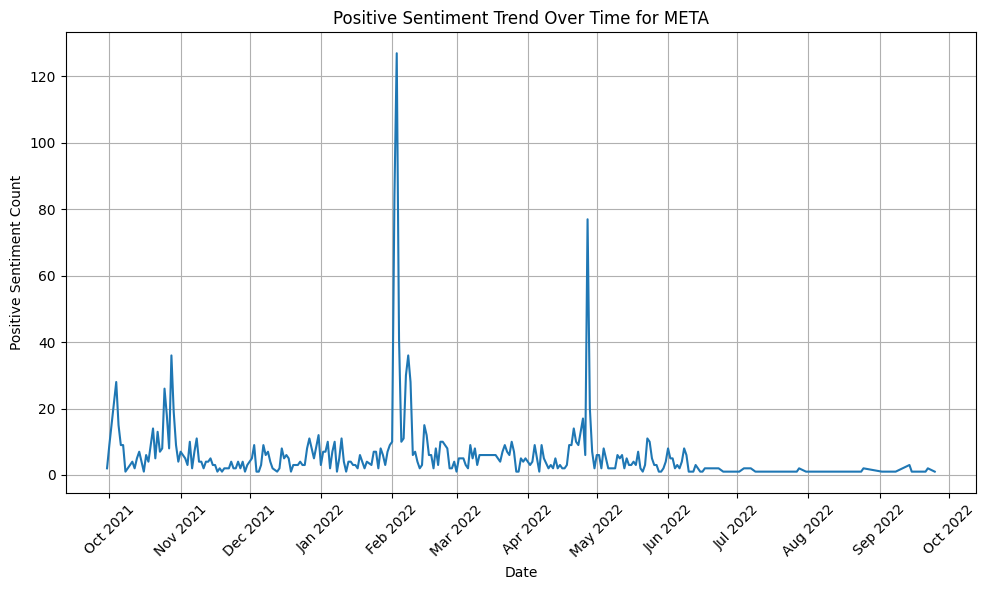

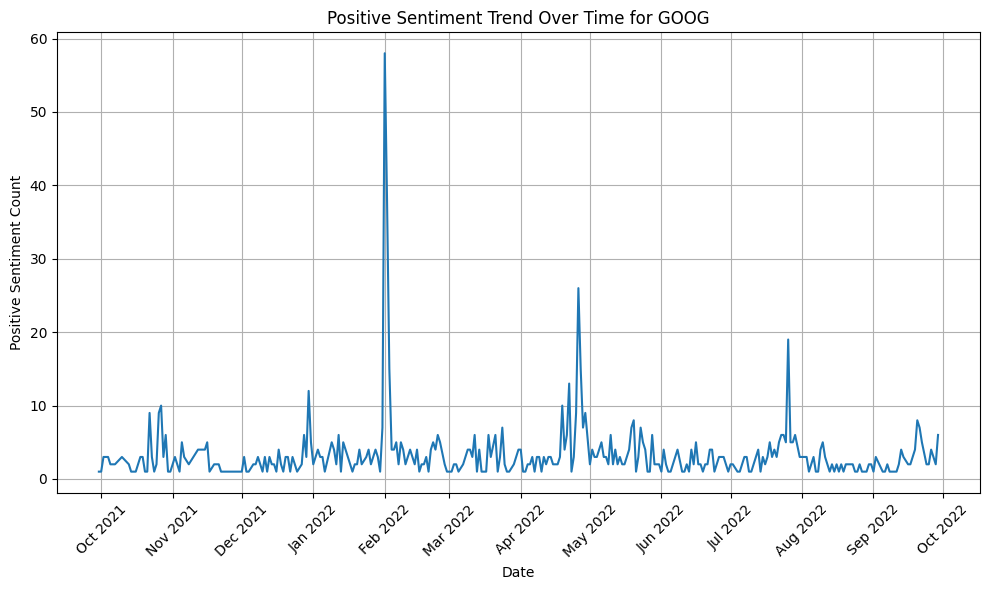

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Sample data setup (replace this with your actual data loading)
# tweetsData = pd.read_csv('your_data.csv')  # Load your dataset

# Ensure 'Date' column is in datetime format and extract only the date part
tweetsData['Date'] = pd.to_datetime(tweetsData['Date']).dt.date

# Define target stocks and initialize sentiment count dictionaries
target_stocks = ['TSLA', 'AAPL', 'INTC', 'AMZN', 'MSFT', 'META', 'GOOG']
sentiment_counts = {stock: defaultdict(int) for stock in target_stocks}

# Populate sentiment counts
for date, sentiment, stock in zip(tweetsData['Date'], tweetsData['Sentiment'], tweetsData['Stock Name']):
    if stock in target_stocks and sentiment == 1:
        sentiment_counts[stock][date] += 1

# Convert sentiment counts to DataFrames
sentiment_dfs = {}
for stock, counts in sentiment_counts.items():
    df = pd.DataFrame(list(counts.items()), columns=['Date', 'Positive_Sentiment_Count'])
    df = df.sort_values('Date').reset_index(drop=True)
    sentiment_dfs[stock] = df

import matplotlib.dates as mdates

# Plot individual graphs for each stock with month-wise x-axis labeling
for stock, df in sentiment_dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Positive_Sentiment_Count'])  # Line plot without markers
    plt.title(f'Positive Sentiment Trend Over Time for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Positive Sentiment Count')
    
    # Set the major locator to months and format the labels to show only the month and year
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at each month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format: "Jan 2022"
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [8]:
# Load the stock price dataset
stock_data = pd.read_csv("Data/financeData.csv")

# Filtering by tech stocks and converting date to datetime format
tech_stocks = ['TSLA', 'AAPL', 'INTC', 'AMZN', 'MSFT', 'META', 'GOOG']
tech_stock_data = stock_data[stock_data['Stock Name'].isin(tech_stocks)]
tech_stock_data['Date'] = pd.to_datetime(tech_stock_data['Date'])

tech_stock_data['Stock Name'].unique()


/var/folders/l7/h15d3n8j2dq3nvmv6kg65qyc0000gn/T/ipykernel_88142/3721348503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_stock_data['Date'] = pd.to_datetime(tech_stock_data['Date'])


array(['TSLA', 'MSFT', 'META', 'AMZN', 'GOOG', 'AAPL', 'INTC'],
      dtype=object)

/var/folders/l7/h15d3n8j2dq3nvmv6kg65qyc0000gn/T/ipykernel_88142/580390590.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_stock_data['Date'] = pd.to_datetime(tech_stock_data['Date'])


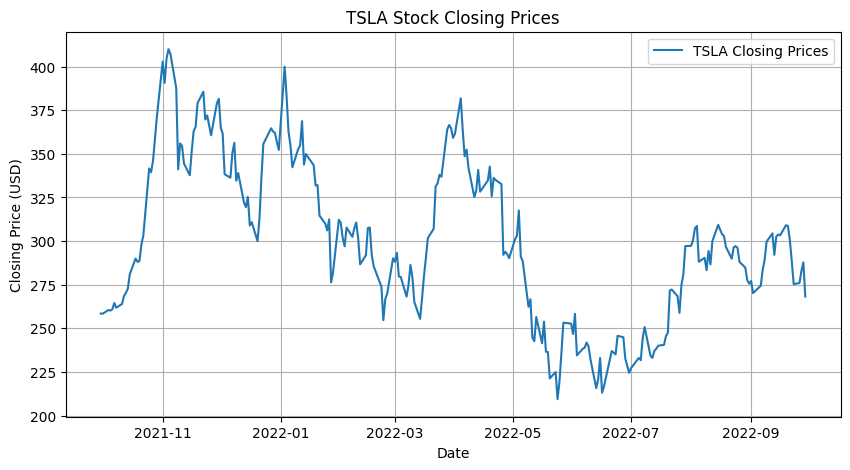

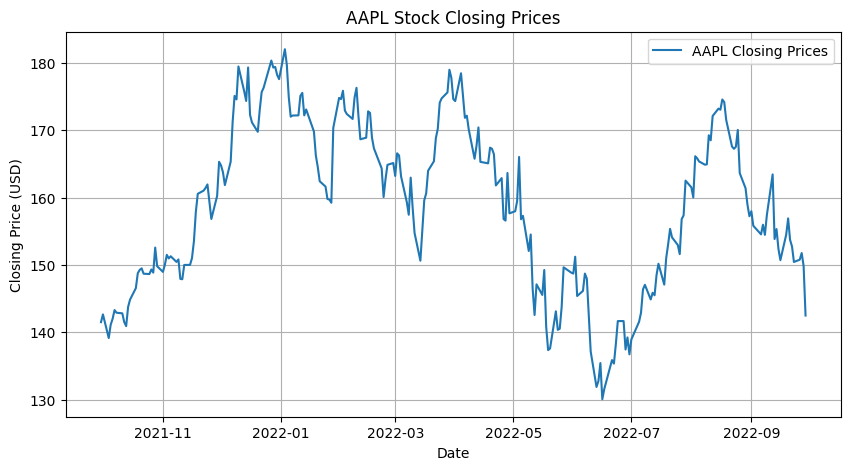

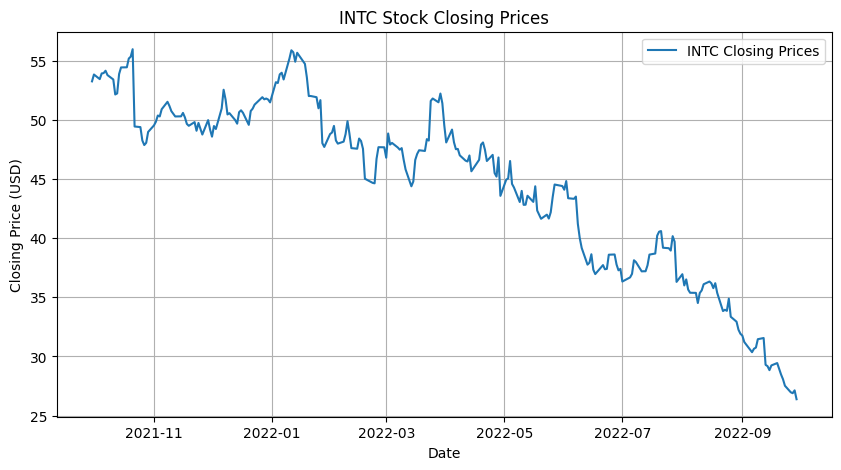

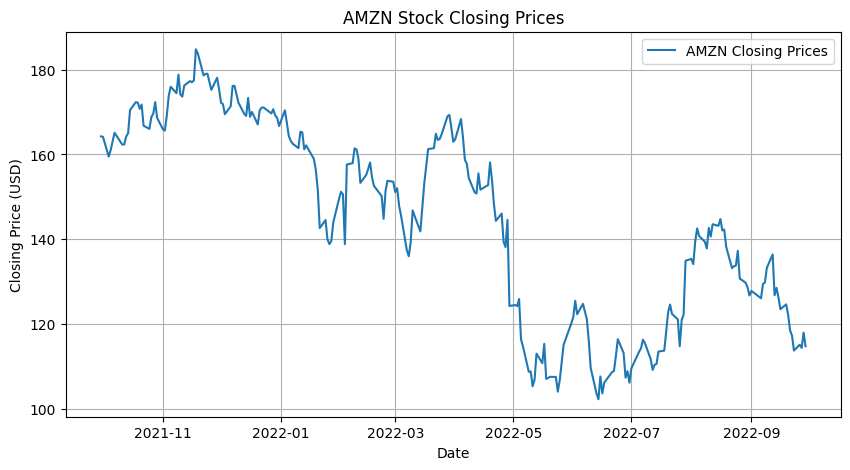

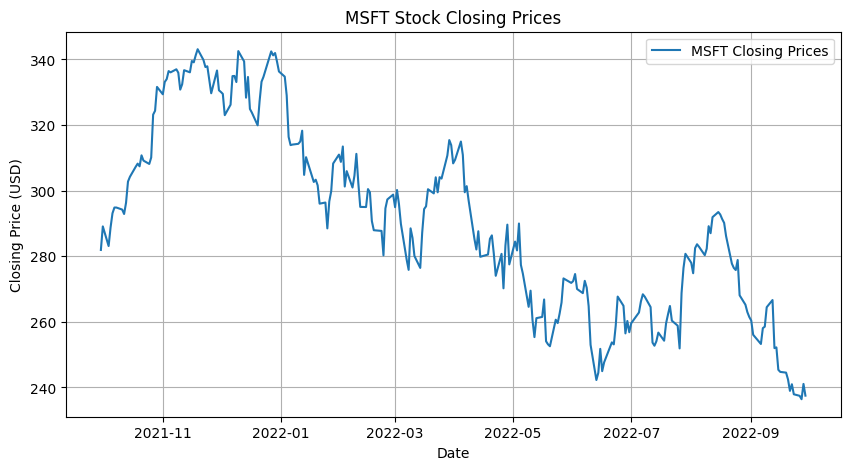

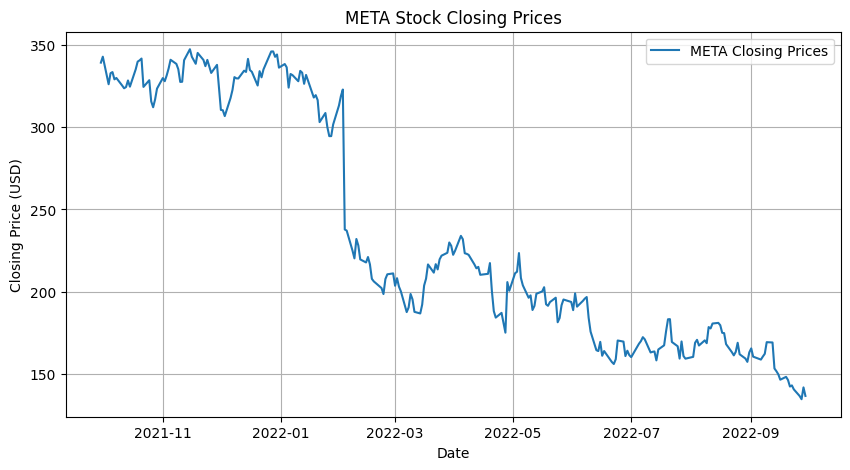

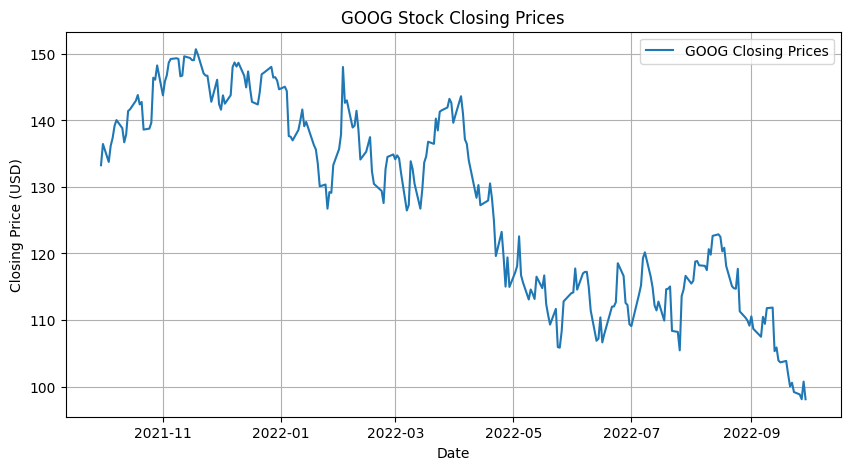

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
stock_data = pd.read_csv("Data/financeData.csv")

# Filtering by tech stocks and converting the date column to datetime format
tech_stocks = ['TSLA', 'AAPL', 'INTC', 'AMZN', 'MSFT', 'META', 'GOOG']
tech_stock_data = stock_data[stock_data['Stock Name'].isin(tech_stocks)]
tech_stock_data['Date'] = pd.to_datetime(tech_stock_data['Date'])

# Plot individual graphs for each stock
for stock in tech_stocks:
    stock_data = tech_stock_data[tech_stock_data['Stock Name'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f"{stock} Closing Prices")
    
    # Customize the plot
    plt.title(f"{stock} Stock Closing Prices")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()
